# Individual Plan
## Importing Data

+ Imported Players
+ Imported Sessions

[gitHub link:](https://github.com/burgerchae/DSCI100-Project-Individual-)

https://github.com/burgerchae/DSCI100-Project-Individual-

## Load package and import data

In [1]:
library(tidyverse)
url = 'https://drive.google.com/uc?export=download&id=13vWD5kG6mLHxRaxWOSoxvUXCdmhDwD97'

players<- read_csv(url)
dim(players); head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [2]:
players_tidy <- players |>
  mutate(
    played_hours = as.numeric(played_hours),
    Age          = as.numeric(Age),
    experience   = as_factor(experience),
    gender       = as_factor(gender),
    subscribe    = as_factor(subscribe)
  )

In [3]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)
players |>summarize(max(played_hours), min(played_hours), max(Age), min(Age))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


max(played_hours),min(played_hours),max(Age),min(Age)
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,NA,NA


## Data Description

### There are 196 observations and 7 variables, the variables are:
+ Experience(character): which describes the experiecne level of the players, as: Pro, Veteran, Amateur, Ruglar, and Beginner.
+ Subscribe (logical): which describes whether or not the player has subscribed the game info, as: TRUE and FALSE.
+ hashedEmail(character): which records the hashing encoded email adresses of players.
+ Played_hours(double character): which records the game playtime in hours, with a range from 0 to 99.
+ Name(characters): which records the players' name.
+ Gender(character): which records the players' gender.
+ Age(double integer): which describes the player's age.

### Potential Issues

1. We cannot understand the hased email address, this column might be useless
2. If we want to used experience as a predictor, it is not numerical, we need to process it first, one-hot encoding is an option.
3. The quantities of Agender, Other, and Two-Spirited are very small compared to Male and Female. Maybe we can merge them if we want to use gender as the response variable or as the predictor.

In [4]:
players |> group_by(gender) |> summarize(count=n())

gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


## Questions

### In the 3 broad areas we have, I choose the direction concerning number 2:
+ Which "kinds" of players are most likely to contribute a large amount of data?

### The specific question that I came up with is:
+ Can player characteristics and behaviours—such as number of sessions, total playtime, and average session length—predict the total amount of data contributed by each player in the dataset?

### How would the data address my question of interest?
+ The sessions.csv file records detailed information about each gameplay session, while players.csv contains player-level attributes. 
+ By grouping sessions by player_id, I can compute summary behavioural variables for each player (e.g., total sessions, total playtime, mean session length).
+ Merging these summaries with the player attributes will produce a tidy player-level dataset.
+ This dataset will allow me to build a predictive model to determine which characteristics are most strongly associated with high data contribution.


## Exploratory Data Analysis & Data Visualization

In [5]:
players_tidy <- players |>
  mutate(
    played_hours = as.numeric(played_hours),
    Age          = as.numeric(Age),
    experience   = as_factor(experience),
    gender       = as_factor(gender),
    subscribe    = as_factor(subscribe)
  )
players_tidy

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [6]:
players_tidy |>
  summarize(across(everything(), ~ sum(is.na(.x)))) |>
  pivot_longer(everything(),
               names_to = "column",
               values_to = "na_count")

column,na_count
<chr>,<int>
experience,0
subscribe,0
hashedEmail,0
played_hours,0
name,0
gender,0
Age,2


In [7]:
players_means <- players_tidy |>
  select(where(is.numeric)) |>
  summarize(across(everything(), ~ round(mean(.x, na.rm = TRUE), 2))) |>
  pivot_longer(everything(),
               names_to = "variable",
               values_to = "mean_2dp")

players_means

variable,mean_2dp
<chr>,<dbl>
played_hours,5.85
Age,21.14


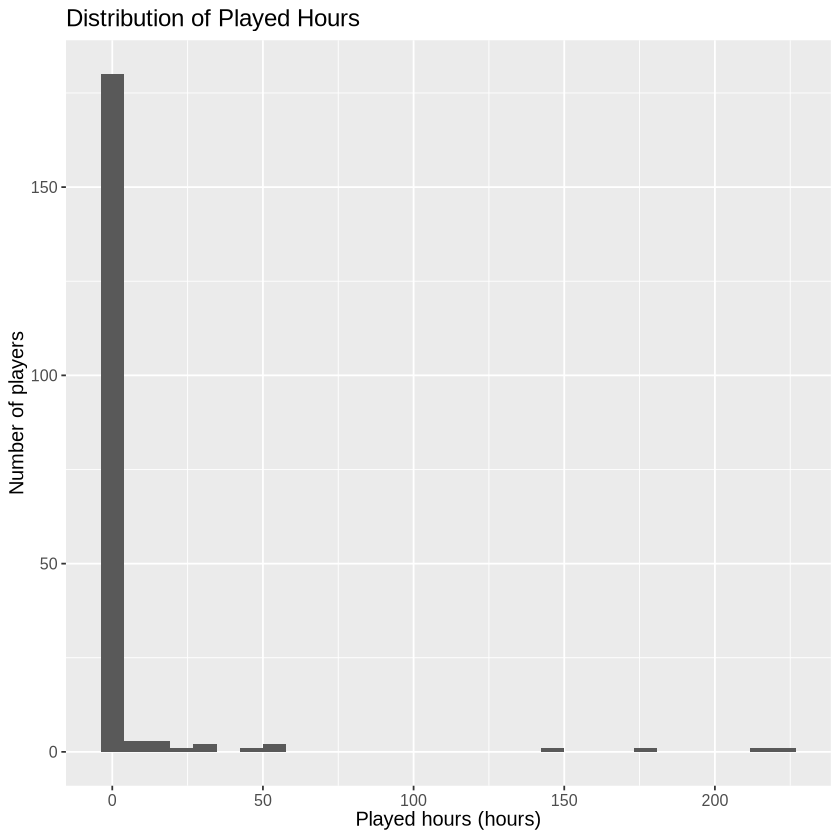

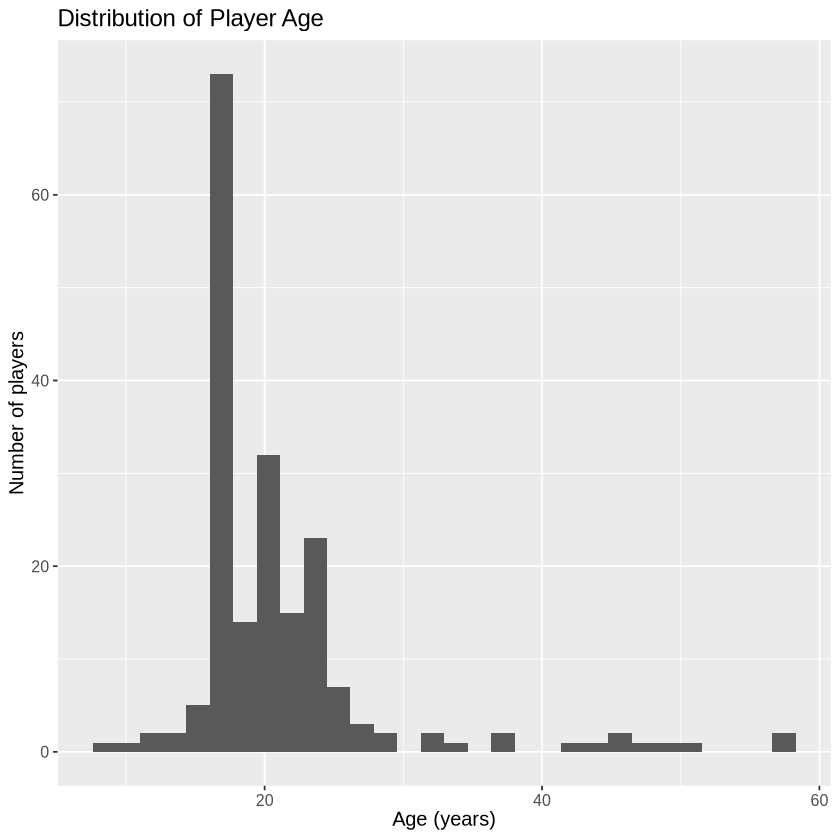

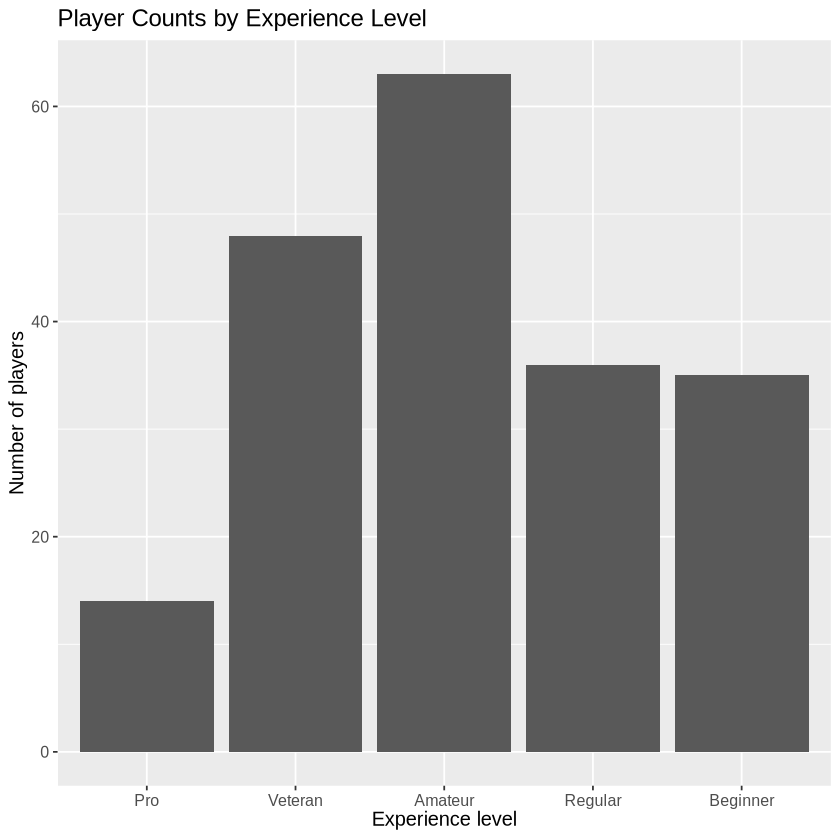

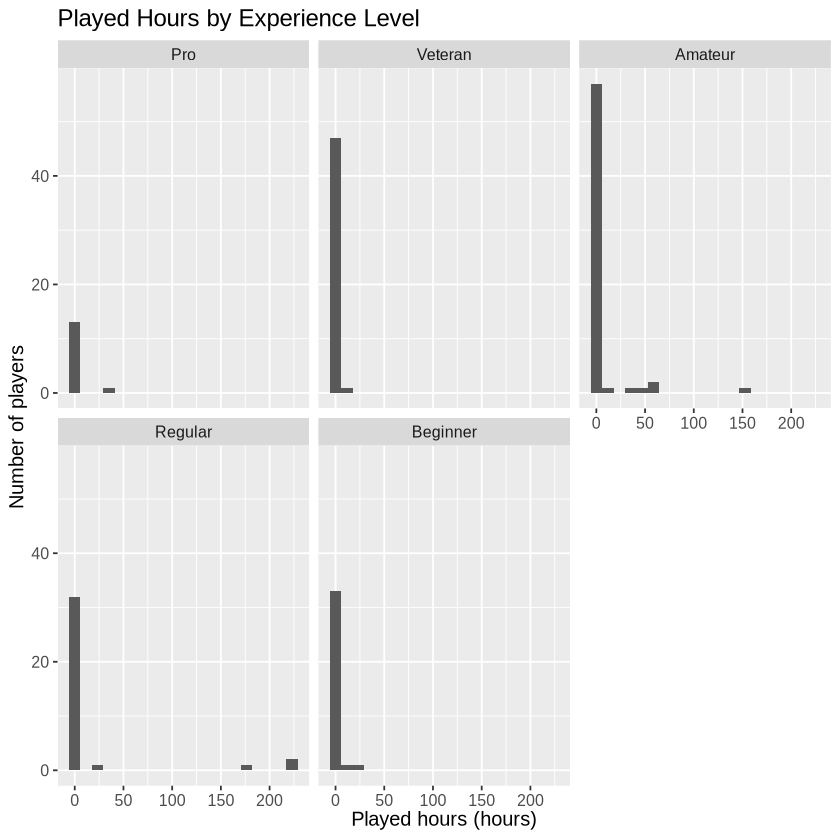

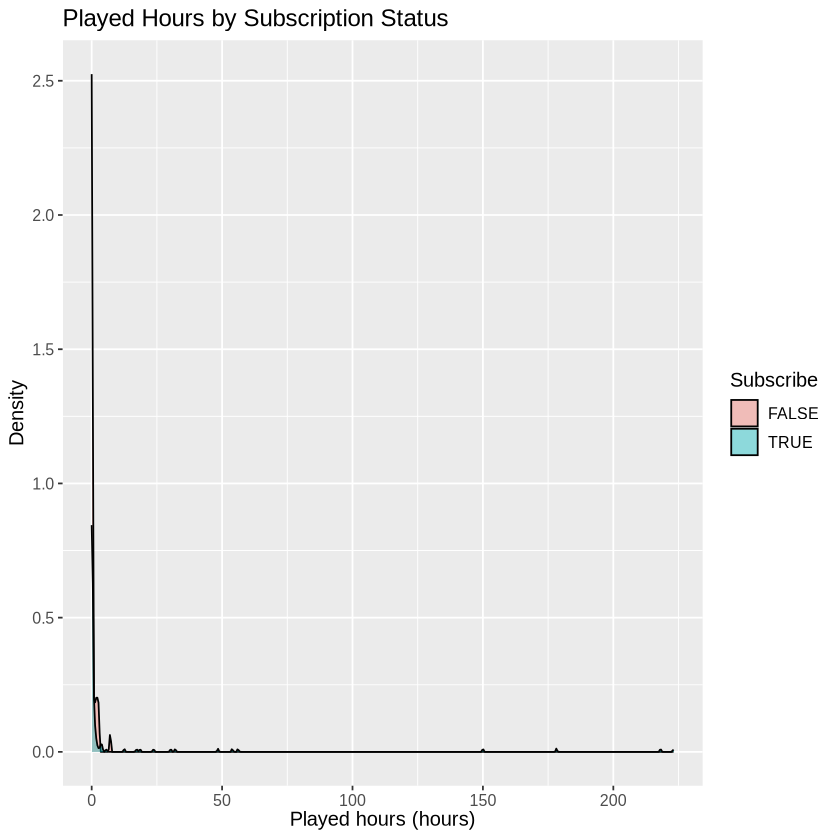

In [8]:
players_tidy |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 30, na.rm = TRUE) +
  labs(
    title = "Distribution of Played Hours",
    x = "Played hours (hours)",
    y = "Number of players"
  ) +
  theme(text = element_text(size = 12))

players_tidy |>
  ggplot(aes(x = Age)) +
  geom_histogram(bins = 30, na.rm = TRUE) +
  labs(
    title = "Distribution of Player Age",
    x = "Age (years)",
    y = "Number of players"
  ) +
  theme(text = element_text(size = 12))

players_tidy |>
  ggplot(aes(x = experience)) +
  geom_bar(na.rm = TRUE) +
  labs(
    title = "Player Counts by Experience Level",
    x = "Experience level",
    y = "Number of players"
  ) +
  theme(text = element_text(size = 12))

players_tidy |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 20, na.rm = TRUE) +
  facet_wrap(vars(experience)) +
  labs(
    title = "Played Hours by Experience Level",
    x = "Played hours (hours)",
    y = "Number of players"
  ) +
  theme(text = element_text(size = 12))

players_tidy |>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_density(alpha = 0.4, na.rm = TRUE) +
  labs(
    title = "Played Hours by Subscription Status",
    x = "Played hours (hours)",
    y = "Density",
    fill = "Subscribe"
  ) +
  theme(text = element_text(size = 12))

## Insights from the graph:
+ The plots show that total played hours are strongly right-skewed, meaning only a small number of players contribute very large amounts of data.
+ This is important for our question because these heavy-usage players are the group we want to understand.
+ The faceted histograms suggest that more experienced players—especially Veterans and Pros—tend to have higher played hours compared to Amateurs or Regular players.
+ The age and experience distributions are also uneven, which may affect how reliably we can compare different player groups.
+ Overall, these patterns highlight that experience level and total activity are closely related and that skewed data and unbalanced groups will be important issues to consider later.

## Method and Plan
+ To answer my question about which kinds of players are most likely to contribute a large amount of data, I plan to use a k-nearest neighbours (KNN) regression model. 
+ This method is appropriate because my response variable (total played hours) is quantitative, and KNN can capture nonlinear relationships between player characteristics and their total data contribution without requiring a strict model form.

### Why is this method appropriate?
+ KNN regression works well when relationships between variables may be complex or nonlinear, which seems likely here because player behaviour can vary widely.
+ It also makes few assumptions about the underlying data distribution, which is useful since exploratory plots showed strong skewness and uneven group sizes across player types.

### Assumptions
KNN assumes that:
+ Predictors are scaled appropriately so distance calculations are meaningful.
+ Observations that are close in predictor space have similar response values.
+ These are reasonable assumptions for player behaviour data, where similar players may contribute similar amounts of data.

### Potential Limitations
KNN can struggle with:
+ Skewed or highly imbalanced data, which our dataset contains.
+ High-dimensional data, because distance measures become less meaningful.
+ Outliers, which may distort neighbour calculations.
+ It is also computationally heavier for large datasets, but this dataset is small enough that this should not be a major issue.

### Model Comparison and Selection
+ Because KNN’s main tuning parameter is the number of neighbours 𝑘, I will compare multiple values of 𝑘 using cross-validation.
+ I will choose the model that minimizes prediction error on the validation folds.
+ Cross-validation ensures that the model generalizes well and is not overly influenced by any particular subset of players.

### Data Processing Plan
Before modelling, I will:
+ Split the data once into training (80%) and testing (20%) using initial_split().
+ Perform all preprocessing only on the training set, including scaling the predictor variables using a recipe.
+ Use v-fold cross-validation (v = 5) on the training set to tune the value of 𝑘.
+ After selecting the best model, I will apply it to the test set to assess final performance.